In [128]:
import dask
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import *
import seaborn
import jieba
import re
import string
from zhon.hanzi import punctuation, stops, non_stops
import gensim
from gensim.models.word2vec import Word2Vec, LineSentence
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import timeit
import warnings
import zipfile
import os
import sys
import copy
warnings.filterwarnings('ignore')

In [1]:
# load the corpus for word2vec
user = input("Who is using the notebook? ")
if user == "Tim":
    corpus_name = "/Users/timqzhang/Desktop/UChicago/MACSS_Spring_2020/content_local/rmrb/7z"
elif user == "Linghui":
    corpus_name = "/Users/linghuiwu/uchicago/courseworks/soci40133/rmrb/7z"
elif user == "Minghao":
    corpus_name = "D:/学习资料/研一三学期/Content Analysis/Final_Project/rmrb/7z"
elif user == "Minghao_RCC":
    corpus_name = "/home/mhyang/EconContent/data/corpus_by_year/"

Who is using the notebook? Minghao_RCC


### Word2Vec with full sample

In [5]:
# a first time indicator 
# please enter "No" because the word2vec model with full sample has been uploaded to git repo
first_time = input("Is this the first time to train the word2vec model with full sample? ")

Is this the first time to train the model? No


In [6]:
%%time
if first_time == "Yes":
#     corpus_full = []
#     for year in range(1965, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus_full.append(tokens)
#     model_full = Word2Vec(corpus_full, size=200, window=10, min_count=5, workers=8, seed=0)
#     model_full.save('../data/rmrb_full_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_full = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_full_W2V')
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

CPU times: user 1.45 s, sys: 608 ms, total: 2.06 s
Wall time: 2.56 s


In [7]:
# most similar words to "经济"
model_full.most_similar("经济", topn=30)

[('国民经济', 0.7047548890113831),
 ('经济社会', 0.6835517287254333),
 ('在经济上', 0.584583044052124),
 ('城乡经济', 0.5507814884185791),
 ('工业生产', 0.5420782566070557),
 ('商品流通', 0.5362972021102905),
 ('对外贸易', 0.5362279415130615),
 ('经济繁荣', 0.5219799280166626),
 ('工业', 0.5194350481033325),
 ('宏观经济', 0.5095250606536865),
 ('产业', 0.5007330775260925),
 ('商品生产', 0.49550092220306396),
 ('商品经济', 0.4891799986362457),
 ('政治经济', 0.48831894993782043),
 ('物资流通', 0.4858139753341675),
 ('生产力', 0.48249131441116333),
 ('出口贸易', 0.4787532389163971),
 ('国家', 0.4786701202392578),
 ('经贸', 0.475691556930542),
 ('平衡', 0.47392386198043823),
 ('企业', 0.4730418622493744),
 ('发展', 0.4718932807445526),
 ('稳定', 0.46824193000793457),
 ('赖际', 0.46810856461524963),
 ('沿海经济', 0.4664963185787201),
 ('集体经济', 0.4660484790802002),
 ('生产', 0.46557676792144775),
 ('旅游业', 0.4646378755569458),
 ('加工工业', 0.464486300945282),
 ('国际贸易', 0.4625011384487152)]

In [8]:
# most similar words to "政治"
model_full.most_similar("政治", topn=30)

[('在政治上', 0.7189272046089172),
 ('政治素质', 0.49460527300834656),
 ('党的建设', 0.4752221703529358),
 ('崇美', 0.4627997875213623),
 ('党建', 0.4455682337284088),
 ('道德修养', 0.44051045179367065),
 ('教育', 0.4352807402610779),
 ('作风纪律', 0.4329605996608734),
 ('社会主义', 0.43256697058677673),
 ('德党', 0.42983633279800415),
 ('政治路线', 0.4284876585006714),
 ('党的领导', 0.42812931537628174),
 ('政治宣传', 0.4278131127357483),
 ('政治性', 0.4265213906764984),
 ('必须', 0.4184496998786926),
 ('专政', 0.4180828332901001),
 ('军事', 0.4180217981338501),
 ('社会', 0.4163997769355774),
 ('道德', 0.41571980714797974),
 ('阶级斗争', 0.413579523563385),
 ('革命性', 0.41300487518310547),
 ('加诺兄', 0.41279923915863037),
 ('上筑牢', 0.4124164283275604),
 ('理论', 0.4100203514099121),
 ('资产阶级', 0.40842607617378235),
 ('民主', 0.4040853679180145),
 ('政治工作者', 0.4038689136505127),
 ('强调', 0.4020741581916809),
 ('意识形态', 0.401529461145401),
 ('巴迪亚', 0.3998579978942871)]

In [9]:
# most similar words to "政治" + "经济"
model_full.most_similar(positive=[u"政治", u"经济"], topn=20)

[('社会', 0.5568037033081055),
 ('社会主义', 0.5322310924530029),
 ('政治经济', 0.5294690132141113),
 ('国民经济', 0.5292337536811829),
 ('巴迪亚', 0.5210733413696289),
 ('经济社会', 0.518622100353241),
 ('必须', 0.5129322409629822),
 ('改革', 0.507105827331543),
 ('西元彻', 0.5062365531921387),
 ('在政治上', 0.4994303584098816),
 ('关系', 0.4970846176147461),
 ('德党', 0.49647772312164307),
 ('文化', 0.4950624108314514),
 ('各项', 0.49228447675704956),
 ('发展', 0.4885441064834595),
 ('政策', 0.4873436689376831),
 ('方面', 0.4856113791465759),
 ('自身', 0.48548656702041626),
 ('船旗国', 0.4851929843425751),
 ('通政', 0.4812116026878357)]

In [10]:
# most similar words to "企业"
model_full.most_similar("企业", topn=20)

[('国营企业', 0.7253013253211975),
 ('骨干企业', 0.6966310143470764),
 ('集体企业', 0.6965148448944092),
 ('小企业', 0.6924573183059692),
 ('工商企业', 0.6889418363571167),
 ('国有企业', 0.6807361841201782),
 ('小型企业', 0.6621137857437134),
 ('乡镇企业', 0.6548891663551331),
 ('行业', 0.652941107749939),
 ('经营', 0.6449532508850098),
 ('外贸企业', 0.6357970237731934),
 ('亏损企业', 0.6312141418457031),
 ('三资企业', 0.5996057391166687),
 ('产品', 0.5948319435119629),
 ('中小企业', 0.5900083780288696),
 ('资产', 0.587431013584137),
 ('工厂', 0.5856354236602783),
 ('化工企业', 0.5763827562332153),
 ('全民企业', 0.5759526491165161),
 ('单位', 0.572801411151886)]

In [11]:
# 公有制 + 资本主义 - 社会主义
model_full.most_similar(positive=[u'公有制', u'资本主义'], negative=[u'社会主义'])

[('墙脚', 0.5380445122718811),
 ('公有', 0.535496711730957),
 ('初级阶段', 0.4975186884403229),
 ('私有制', 0.49537062644958496),
 ('私有化', 0.46867311000823975),
 ('国营经济', 0.4633598327636719),
 ('单干', 0.4611584544181824),
 ('两极分化', 0.4496586322784424),
 ('所有制', 0.44949597120285034),
 ('个体经济', 0.4468238949775696)]

In [12]:
# 公有制 + 资本主义 - 社会主义
model_full.most_similar(positive=[u'计划经济', u'资本主义'], negative=[u'社会主义'])

[('市场经济', 0.5006380677223206),
 ('统购包销', 0.4762028455734253),
 ('小农经济', 0.4687221646308899),
 ('墙脚', 0.4580497741699219),
 ('统得', 0.4492679536342621),
 ('商品经济', 0.44538071751594543),
 ('初级阶段', 0.440067321062088),
 ('短缺经济', 0.42808371782302856),
 ('空想', 0.42348188161849976),
 ('计划体制', 0.41563528776168823)]

### Projection with economics and politics subsample

In [61]:
# a first time indicator 
# please enter "No" because the word2vec model with subsample has been uploaded to git repo
first_time = input("Is this the first time to train the word2vec model with economics and politics sample? ")

Is this the first time to train the word2vec model with economics and politics sample? No


In [63]:
%%time
# train the word2vec model with economics and politics subsample
if first_time == 'Yes':
#     corpus_sub = []
#     for year in range(1965, 2003):
#         with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
#             for line in f:
#                 tokens = line.split(' ')
#                 tokens.remove('\n')
#                 corpus_sub.append(tokens)
#     model_sub = Word2Vec(corpus_sub, size=200, window=10, min_count=5, workers=8, seed=0)
#     model_sub.save('../models/Word2Vec&Doc2Vec/rmrb_sub_W2V')
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_sub = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_sub_W2V')
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

CPU times: user 626 ms, sys: 213 ms, total: 839 ms
Wall time: 1.3 s


In [64]:
# Prepare for visualization
VisNumWords = 50
VisTargetWords = model_sub.wv.index2word[:VisNumWords]

VisWordsSubMatrix = []
for word in VisTargetWords:
    VisWordsSubMatrix.append(model_sub[word])
VisWordsSubMatrix = np.array(VisWordsSubMatrix)

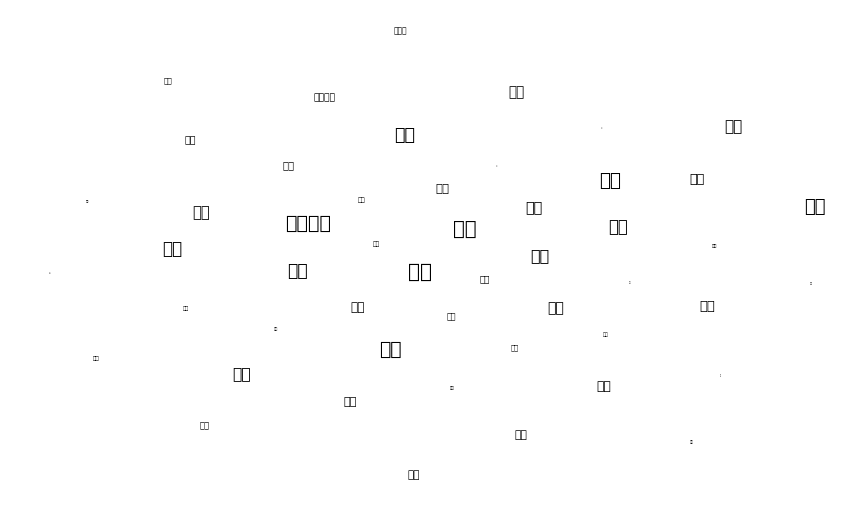

In [65]:
# Visualization with T-SNE 
VisPCAWords = PCA(n_components = 50).fit(VisWordsSubMatrix)
VisReducedPCA = VisPCAWords.transform(VisWordsSubMatrix)
VisTSNEWords = TSNE(n_components = 2).fit_transform(VisReducedPCA)

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize = (15, 9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(VisTSNEWords[:, 0], VisTSNEWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(VisTargetWords):
    ax.annotate(word, (VisTSNEWords[:, 0][i], VisTSNEWords[:, 1][i]), size =  20 * (VisNumWords - i) / VisNumWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [66]:
# most similar words to "计划经济"
model_full.most_similar("计划经济", topn=20)

[('计划体制', 0.6442259550094604),
 ('计划调节', 0.6439828872680664),
 ('市场调节', 0.6180932521820068),
 ('短缺经济', 0.5950658917427063),
 ('转轨', 0.5811647176742554),
 ('高度集中', 0.5631114840507507),
 ('经济体制', 0.5481372475624084),
 ('体制', 0.5398797988891602),
 ('市场机制', 0.5385992527008057),
 ('统得', 0.5231367349624634),
 ('统购包销', 0.5207663774490356),
 ('价值规律', 0.5160901546478271),
 ('市场经济', 0.5151220560073853),
 ('公有制', 0.5126941204071045),
 ('自然经济', 0.5121173858642578),
 ('指令性', 0.5049662590026855),
 ('小农经济', 0.5004916191101074),
 ('僵化', 0.49541807174682617),
 ('双轨制', 0.495257169008255),
 ('商品经济', 0.4913255572319031)]

In [67]:
# most similar words to "市场经济"
model_full.most_similar("市场经济", topn=20)

[('商品经济', 0.8256054520606995),
 ('经济体制', 0.5783637166023254),
 ('商品生产', 0.5539597272872925),
 ('市场机制', 0.5441486239433289),
 ('初级阶段', 0.5326134562492371),
 ('计划经济', 0.5151219367980957),
 ('自我完善', 0.5099714994430542),
 ('义利观', 0.4840741753578186),
 ('市场调节', 0.48258620500564575),
 ('法制', 0.48011767864227295),
 ('市场', 0.4618592858314514),
 ('搞活经济', 0.4542299509048462),
 ('分配原则', 0.4508650302886963),
 ('价值规律', 0.4496119022369385),
 ('商品流通', 0.4416325092315674),
 ('论库', 0.4387979209423065),
 ('法治', 0.43433648347854614),
 ('社会存在', 0.4284587800502777),
 ('公有制', 0.4279572665691376),
 ('经济基础', 0.41887450218200684)]

In [68]:
# words to create dimensions
ProjTargetWords = ['计划经济', '短缺经济', '计划', '计划调节', '计划体制', '市场经济', '商品经济', '市场', '市场调节', '市场机制']

In [69]:
# words to be mapped: industries (come from 《国民经济行业分类》)
ProjTargetWords += ['农业', '采矿业', '制造业', '能源工业', '建筑业', '零售业', 
                    '交通运输业', '餐饮业', '金融业', '房地产业']

In [70]:
# most similar words to "企业"
model_full.most_similar("企业", topn=40)

[('国营企业', 0.7253013253211975),
 ('骨干企业', 0.6966310143470764),
 ('集体企业', 0.6965148448944092),
 ('小企业', 0.6924573183059692),
 ('工商企业', 0.6889418363571167),
 ('国有企业', 0.6807361841201782),
 ('小型企业', 0.6621137857437134),
 ('乡镇企业', 0.6548891663551331),
 ('行业', 0.652941107749939),
 ('经营', 0.6449532508850098),
 ('外贸企业', 0.6357970237731934),
 ('亏损企业', 0.6312141418457031),
 ('三资企业', 0.5996057391166687),
 ('产品', 0.5948319435119629),
 ('中小企业', 0.5900083780288696),
 ('资产', 0.587431013584137),
 ('工厂', 0.5856354236602783),
 ('化工企业', 0.5763827562332153),
 ('全民企业', 0.5759526491165161),
 ('单位', 0.572801411151886),
 ('国企', 0.5710006952285767),
 ('外资企业', 0.5680456161499023),
 ('大中企业', 0.5668426156044006),
 ('国有资产', 0.5625597238540649),
 ('企业经营者', 0.5600638389587402),
 ('上市公司', 0.5492286682128906),
 ('私营企业', 0.548046350479126),
 ('大厂', 0.5462716221809387),
 ('经营者', 0.5420036315917969),
 ('民营企业', 0.5411615371704102),
 ('子公司', 0.5393684506416321),
 ('医药企业', 0.5352437496185303),
 ('工业', 0.535004198551178),
 (

In [71]:
# words to be mapped: firms 
ProjTargetWords += ['国营企业', '集体企业', '国有企业', '乡镇企业', 
                    '三资企业', '外资企业', '私营企业', '民营企业']

In [72]:
# words submatrix
ProjWordsSubMatrix = []
for word in ProjTargetWords:
    ProjWordsSubMatrix.append(model_sub[word])
ProjWordsSubMatrix = np.array(ProjWordsSubMatrix)

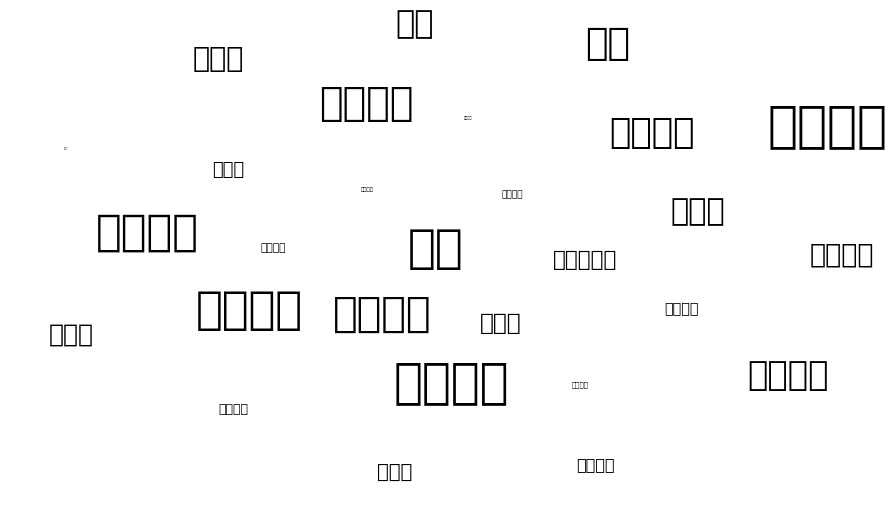

In [73]:
# Visualization
ProjPCATargetWords = PCA(n_components = 20).fit(ProjWordsSubMatrix)
ProjReducedPCA = ProjPCATargetWords.transform(ProjWordsSubMatrix)
ProjTSNETargetWords = TSNE(n_components = 2).fit_transform(ProjReducedPCA)

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(ProjTSNETargetWords[:, 0], ProjTSNETargetWords[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(ProjTargetWords):
    ax.annotate(word, (ProjTSNETargetWords[:, 0][i], ProjTSNETargetWords[:, 1][i]), 
                size=50 * (len(ProjTargetWords) - i) / len(ProjTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [74]:
# necessary functions
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = (np.array([normalize(model[x]) for x in positives]).sum(axis=0) - 
            np.array([normalize(model[y]) for y in negatives]).sum(axis=0))
    return diff

In [75]:
# Create dimensions
plan_mkt = dimension(model_sub,
                     ['计划经济', '短缺经济', '计划', '计划调节', '计划体制'],
                     ['市场经济', '商品经济', '市场', '市场调节', '市场机制'])

In [76]:
# Create domains
Industries = ['农业', '采矿业', '制造业', '能源工业', '建筑业', '零售业', 
              '交通运输业', '餐饮业', '金融业', '房地产业']

Firms = ['国营企业', '集体企业', '国有企业', '乡镇企业', 
         '三资企业', '外资企业', '私营企业', '民营企业']

In [77]:
def makeDF(model, word_list):
    p_m = []
    for word in word_list:
        p_m.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), plan_mkt.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Regime': p_m}, index = word_list)
    return df

In [78]:
# Get the projections
Inddf = makeDF(model_sub, Industries)
Firmdf = makeDF(model_sub, Firms)

In [79]:
# Functions for plotting
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 15, x=0.11, y=1.1)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

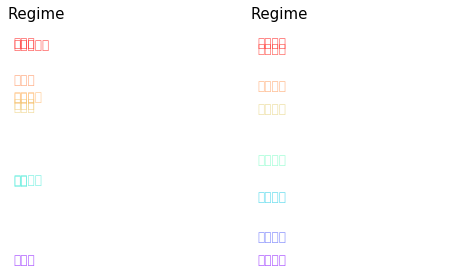

In [80]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, Inddf, 'Regime')
ax2 = fig.add_subplot(122)
PlotDimension(ax2, Firmdf, 'Regime')
plt.show()

### Dynamic word2vec with economics and politics subsample (5-year period)

In [81]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models in different periods? ")

Is this the first time to train the word2vec models in different periods? No


In [148]:
%%time
# train word2vec models in different time periods
if first_time == 'Yes':
#     for start_year in range(1965, 2003, 5):
#         corpus = []
#         if start_year ==2000:
#             for step in range(3):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         else:
#             for step in range(5):
#                 with open(corpus_name + "{}.txt".format(start_year + step), encoding='utf-8') as f:
#                     for line in f:
#                         tokens = line.split(' ')
#                         tokens.remove('\n')
#                         corpus.append(tokens)
#         model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
#         model.save('../models/Word2Vec&Doc2Vec/rmrb_{}-{}_W2V'.format(start_year, start_year + 4))
        print("Please rerun the above cell and enter \"No\".")
else:
    try:
        model_6569 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1965-1969_W2V')
        model_7074 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1970-1974_W2V')
        model_7579 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1975-1979_W2V')
        model_8084 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1980-1984_W2V')
        model_8589 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1985-1989_W2V')
        model_9094 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1990-1994_W2V')
        model_9599 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_1995-1999_W2V')
        model_0002 = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_2000-2004_W2V')
        embedding_raw_dict_5year = {'65-69': model_6569,
                                    '70-74': model_7074,
                                    '75-79': model_7579,
                                    '80-84': model_8084,
                                    '85-89': model_8589,
                                    '90-94': model_9094,
                                    '95-99': model_9599,
                                    '00-02': model_0002}
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

CPU times: user 1.43 s, sys: 200 ms, total: 1.63 s
Wall time: 1.67 s


In [112]:
# functions from week 6 notebook
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words 
    (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [131]:
# define a function to compare different models
def compareModels(embeddings_raw):
    """If you are using time as your category sorting is important"""
    cats = embeddings_raw.keys()
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], 
                                                                              embeddings_raw[catInner]))
    return embeddings_aligned

In [132]:
# define a function to calculate divergence
def getDivergenceDF(word, embeddingsDict):
    cats = embeddingsDict.keys()
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis=0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index=cats)

In [133]:
# define functions to find the most divergent words
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [149]:
embedding_compared_dict_5year = compareModels(Embedding_raw_dict_5year)

经济


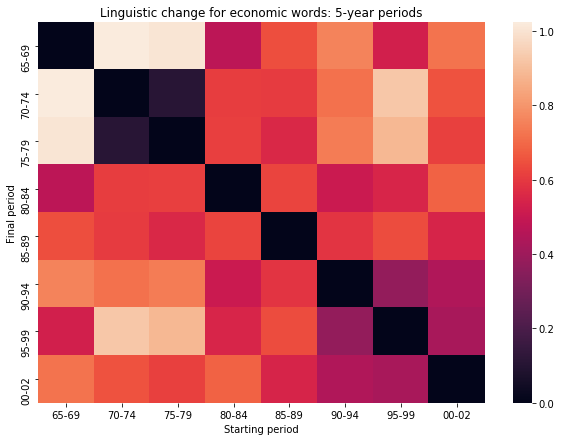

In [154]:
TargetWord = '经济'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting period")
ax.set_ylabel("Final period")
ax.set_title("Linguistic change for economic words: 5-year periods")
plt.show()

政治


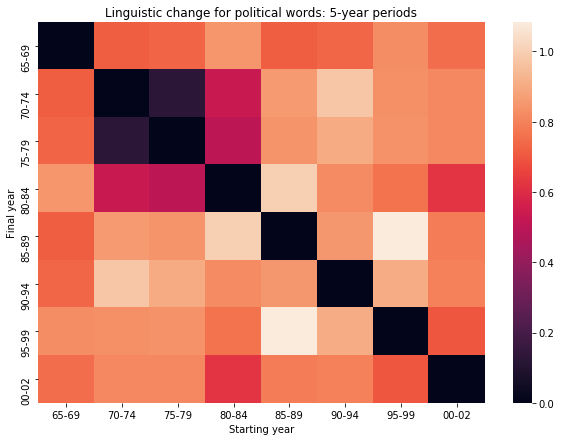

In [155]:
TargetWord = '政治'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_5year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Linguistic change for political words: 5-year periods".format(targetWord))
plt.show()

### Dynamic word2vec with economics and politics subsample (1-year period)

In [140]:
# a first time indicator 
# please enter "No" because the word2vec models in different periods have been uploaded to git repo
first_time = input("Is this the first time to train the word2vec models in different years? ")

Is this the first time to train the word2vec models in different years? No


In [152]:
%%time
# train word2vec models in different years
if first_time == "Yes":
    for year in range(1965, 2003):
        corpus = []
        with open(corpus_name + "{}.txt".format(year), encoding='utf-8') as f:
            for line in f:
                tokens = line.split(' ')
                tokens.remove('\n')
                corpus.append(tokens)
        model = Word2Vec(corpus, size=200, window=10, min_count=5, workers=8, seed=0)
        model.save('../models/Word2Vec&Doc2Vec/rmrb_{}_W2V'.format(year))
    print("Please rerun the above cell and enter \"No\".")
else:
    try:
        embedding_raw_dict_1year = {}
        for year in range(1965, 2003):
            embedding_raw_dict_1year[year] = Word2Vec.load('../models/Word2Vec&Doc2Vec/rmrb_{}_W2V'.format(year))
    except FileNotFoundError:
        print("Please download the .npy files from box because they are larger than 100M.")

CPU times: user 2.78 s, sys: 293 ms, total: 3.07 s
Wall time: 6.41 s


In [153]:
embedding_compared_dict_1year = compareModels(embedding_raw_dict_1year)

经济


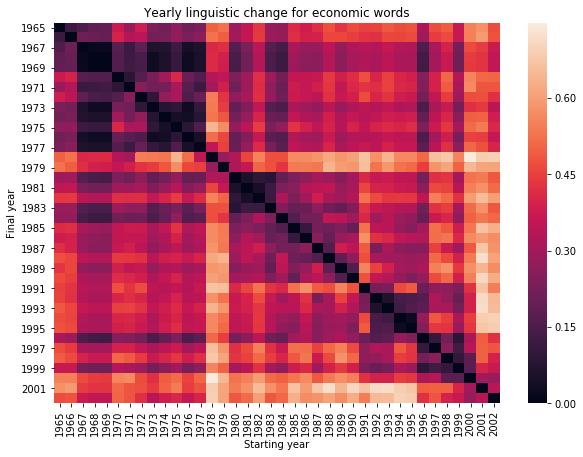

In [156]:
TargetWord = '经济'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for economic words")
plt.show()

政治


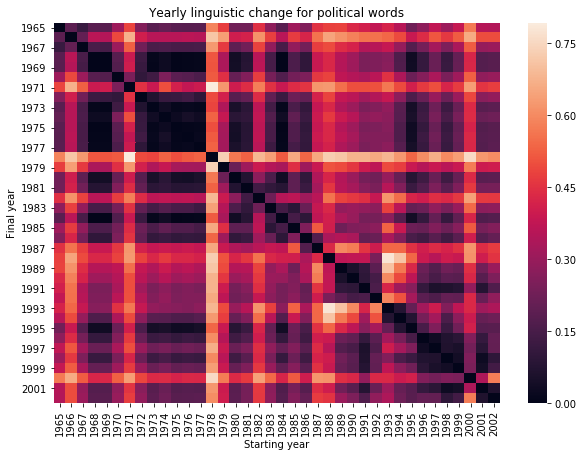

In [157]:
TargetWord = '政治'

pltDF = getDivergenceDF(TargetWord, embedding_compared_dict_1year)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for political words")
plt.show()